## Final Project Submission

Please fill out:
* Student name: Arseniy Tyurin
* Student pace: self paced
* Scheduled project review date/time: 12.18.2018 @ 12:00AM (ET)
* Instructor name: Eli Thomas

# Objective

The goal of this project is to develop a model that will predict house prices in King County, WA as accurate as possible

## Data Science Process

For this project we are going to use **OSEMiN** process, which is the most common way to go through necessary steps for building a model

### OSEMN Process

**Obtain**

This step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data that we think will be necessary for solving this problem.

**Scrub**

During this stage, we'll focus on preprocessing our data. Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage. 

**Explore**

This step focuses on getting to know the dataset you're working with. This step tends to blend with the Scrub step mentioned above. During this step, you'll create visualizations to really get a feel for your dataset. You'll focus on things such as understanding the distribution of different columns, checking for multicollinearity, and other tasks liek that. At the end of this step, you should have a dataset ready for modeling that you've thoroughly explored and are extremely familiar with.

**Model**

This step consists of building and tuning models using all the tools you have in your data science toolbox. In practice, this often means defining a threshold for success, selecting machine learning algorithms to test on the project, and tuning the ones that show promise to try and increase your results. As with the other stages, it is both common and accepted to realize something, jump back to a previous stage like Scrub or Explore, and make some changes to see how it affects the model.

**Interpret**

During this step, you'll interpret the results of your model(s), and communicate results to stakeholders. As with the other frameworks, communication is incredibily important! During this stage, you may come to realize that further investigation is needed, or more data. That's totally fine--figure out what's needed, go get it, and start the process over! If your results are satisfactory to all stakeholders involved, you may also go from this stage right into productionizing your model and automating processes necessary to support it.

## Importing Necessary Libraries

Let's begin with importing libraries we are going to use in our research. We will need libraries to load our data, visualize it, do necessary transformations and built and evaluate our model

In [1]:
# Linear Algebra, Data, Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style='whitegrid')

# Modeling, Evaluation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm

# Feature Selection
from sklearn.feature_selection import RFE
# Scaler
from sklearn.preprocessing import MinMaxScaler

import warnings

## Loading Data

We've given a dataset with housing prices and other features, such as size of the house, how many bedrooms, overall condition and others. Let's take a look at features we have and their meaning:

- **id** - A notation for a house
- **date** - Date house was sold
- **price** - Price is prediction target
- **bedrooms** Number of Bedrooms/House
- **bathrooms** - Number of bathrooms/bedrooms
- **sqft_living** - Square footage of the home
- **sqft_lot** - Square footage of the lot
- **floors** - Total floors (levels) in house
- **waterfront** - House which has a view to a waterfront
- **view** - Has been viewed
- **condition** - How good the condition is ( Overall )
- **grade** - Overall grade given to the housing unit, based on King County grading system
- **sqft_above** - square footage of house apart from basement
- **sqft_basement** - square footage of the basement
- **yr_built** - Built Year
- **yr_renovated** - Year when house was renovated
- **zipcode** - Zipcode
- **lat** - Latitude coordinate
- **long** - Longitude coordinate
- **sqft_living15** - Living room area in 2015 (implies-- some renovations) This might or might not have affected the lotsize area
- **sqft_lot15** - Lot size area in 2015 (implies-- some renovations)

Let's load our data and take a quick look what we are dealing with

In [2]:
# Loading data into pandas DataFrame
df = pd.read_csv('kc_house_data.csv')

In [3]:
warnings.filterwarnings('ignore')
# Brief look at the data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Scrubbing Data

During this stage, we'll focus on preprocessing our data. Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage.

### 1. Dealing with data types

Machine learning algorithms works only with numerical data, so it's important to check our data for types and make necessary changes to it

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Most of the data looks good except `sqft_basement` and `date` features. Both have object type, which means they presented as string values.

Let's convert `sqft_basement` into float type, and `date` into datetime

### 1.1 Changing `date` feature to datetime type

In [6]:
# Converting date to datetime
df.date = pd.to_datetime(df.date)

### 1.2 Changing `sqft_basement` feature to float

<b>Previously</b> I've tried to convert `sqft_basement` feature into float type, but python raised an error.

Let's check data first for any anomalies

In [7]:
# Checking for unusual values
df.sqft_basement.value_counts()[:10]

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
Name: sqft_basement, dtype: int64

We have a lot of '0.0' values, which means the house has no basement at all, and 454 records with '?' symbol. To make a decision on what to replace with our unknown values, let's see how many houses without basement we have respectively to houses with basement

In [8]:
print('Houses with no basement:', round( sum(df.sqft_basement == '0.0') / len(df), 2 ) * 100, '%' )

Houses with no basement: 59.0 %


Almost 60% of houses have no basement, which suggests that our feature more likely to be categorical variable. Let's replace '?' values with '0' as well, because it would be really hard to figure out if the house have basement or not

In [9]:
df.sqft_basement = df.sqft_basement.map(lambda x: '0' if x == '?' else x)
df.sqft_basement = df.sqft_basement.astype('float')

### 2. Dealing with Null values

Our model wouldn't perform well if our data contains Null values. We can check for that occasion by using `isna()` function.

In [10]:
print('Features with Null values:\n')
df.isna().sum()

Features with Null values:



id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We have several features that contains null values:
    - `waterfront`
    - `view`
    - `yr_renovated`

Lets explore waterfront and view features to see if we can find is any relationship between them

### 2.1 Dealing with `waterfront` null values

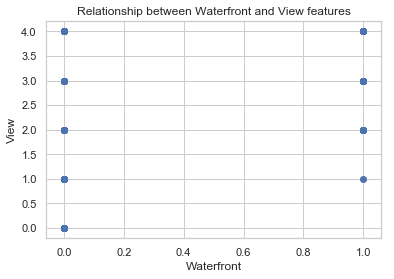

In [11]:
sns.set_style('whitegrid')

plt.scatter(df.waterfront, df.view)
plt.title('Relationship between Waterfront and View features')
plt.xlabel('Waterfront')
plt.ylabel('View')
plt.show()

There is clear evidence that houses with 0 views also have 0 waterfront. We can confidently replace `Waterfront` null values when `View` feature also has 0. But before we do that lets see how many records we would cover of all null values

In [12]:
print('Percentage of null values we can replace confidently:',round( len(df[ (df.waterfront.isna()) & (df.view==0) ])/sum(df.waterfront.isna())*100, 2), '%' )

Percentage of null values we can replace confidently: 88.8 %


Since most of the `waterfront` records have value `0` and 88.8% of `?` we can confidently replace with `0` also, lets go ahead and replace all of them with `0`

In [13]:
df.loc[df.waterfront.isna(), 'waterfront'] = 0
df.waterfront = df.waterfront.astype('int')

### 2.2 Dealing with `view` null values

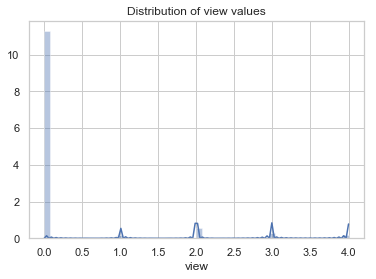

In [14]:
sns.distplot( df[df.view.notna()]['view'] )
plt.title('Distribution of view values')
plt.show()

The `view` feature has only `63` null values out of `21534`, and the plot suggests that most of the values are zeros, so let's just replace them with `0` as well, since it's not gonna affect our model

In [15]:
df.loc[df.view.isna(), 'view'] = 0
df.view = df.view.astype('int')

### 2.3 Dealing with `yr_renovated` null values

It would be impossible to find relationships between `yr_renovated` feature and the rest of the dataset, so meaningful decision would be to replace null values with 0

In [16]:
df.loc[df.yr_renovated.isna(), 'yr_renovated'] = 0

### 3 Dealing with multicollinearity

In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy.

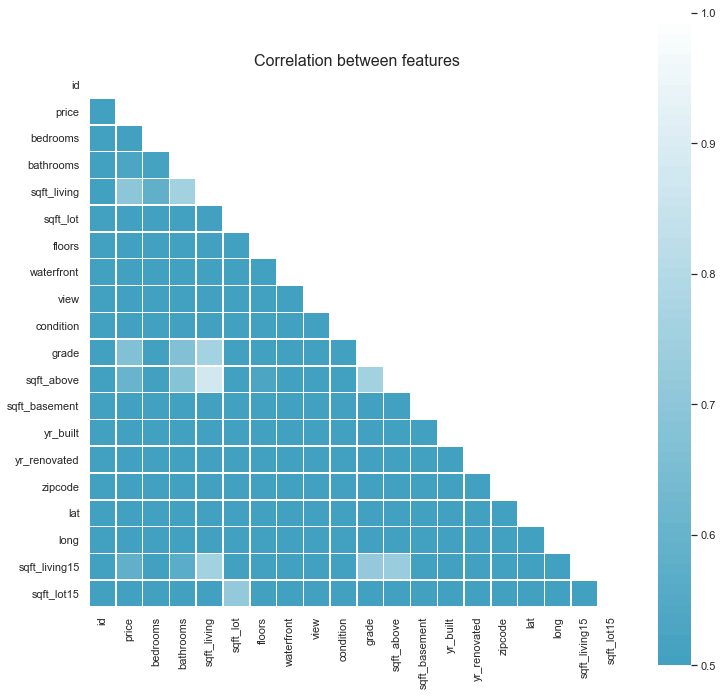

In [17]:
plt.figure(figsize=(12,12))
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, center=0, vmin=0.5, square=True, linewidths=.5, cmap='ocean')
plt.title('Correlation between features', fontdict={'fontsize': 16})
plt.show()

There is strong correlation between `sqft_living` and `sqft_above`, it would be reasonable to remove one of them.

In [18]:
# Removing sqft_above from our dataset
df.drop('sqft_above', axis=1, inplace=True)

## Exploratory Analysis

During this stage we would be able to answer following questions:

1. What drives prices up?
2. What is the best time to sell the house?
3. How to improve house to make larger return?
4. How location is playing role?

### Changes in renovated houses

Some of the houses were sold multiple times due to renovation. Let's see how price changed and check if there is any changes to renovated houses.

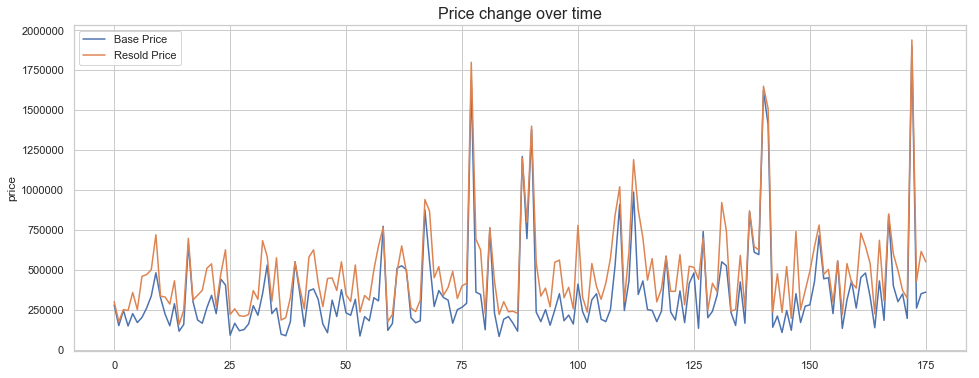

Price increase after renovation: 28 %


In [19]:
dup = df[ df.id.duplicated(keep=False) ]
prices = dup.groupby('id')['price']

plt.figure(figsize=(16,6))
sns.lineplot( range(len(prices)), prices.first(), label='Base Price' )
sns.lineplot( range(len(prices)), prices.last(), label='Resold Price' )
plt.title('Price change over time', fontdict={'fontsize': 16})
plt.legend()
plt.show()

print('Price increase after renovation:',round( ( 1 - ( prices.first().mean() / prices.last().mean() ) ) * 100 ),'%' )

Plot suggests that most of renovated houses were sold for a higher price (28% higher on average) in period from 2014 to 2015.

Is there any changes in houses during that period?

In [20]:
print('Mean house size before renovation:',round(df.sqft_living.mean()),'. After:', round(df.sqft_living15.mean()) )
print('Mean lot size before renovation:',round(df.sqft_lot.mean()),'. After:', round(df.sqft_lot.mean()) )

Mean house size before renovation: 2080 . After: 1987
Mean lot size before renovation: 15099 . After: 15099


Good thing to remember that our resold houses were reduced in living space after renovation, but lot size generally stayed the same

In [21]:
# Dropping features we not gonna use in our model
df.drop(['id','sqft_living15','sqft_lot15'], axis=1, inplace=True)

### Development dynamic

Lets check how many houses were built over the years

In [22]:
decades = np.linspace(1900, 2016, 30, dtype='int')
count = []
for i in range(0,29):
    count.append(len(df[(df.yr_built >= decades[i]) & (df.yr_built <= decades[i+1])]))

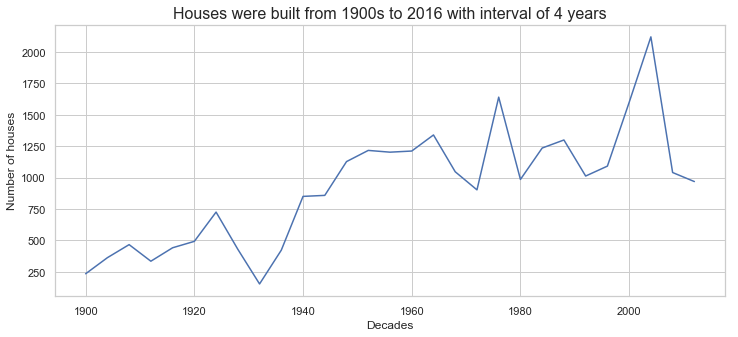

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
sns.lineplot(decades[:-1], count)
plt.title('Houses were built from 1900s to 2016 with interval of 4 years', fontdict={'fontsize': 16})
plt.xlabel('Decades')
plt.ylabel('Number of houses')
plt.show()

### Best month to sell house

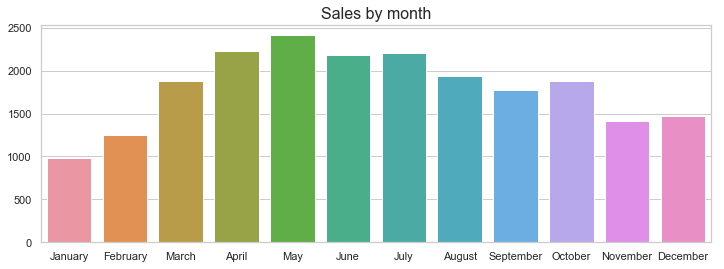

In [24]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_sales = []

for i in range(1,13):
    monthly_sales.append(sum(df.date.dt.month == i))
    
plt.figure(figsize=(12,4))
sns.barplot(months, monthly_sales)
plt.title('Sales by month', fontdict={'fontsize': 16})
plt.show()

### Best day to sell house

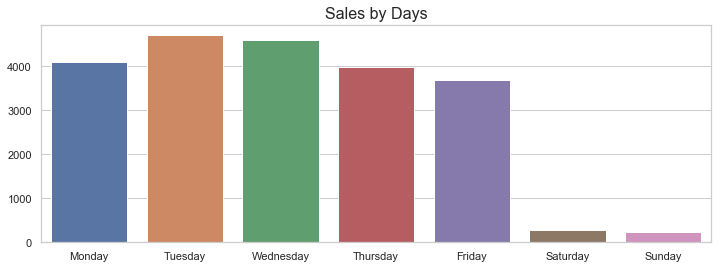

In [25]:
day_of_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily_sales = []

for i in range(0,7):
    daily_sales.append(sum(df.date.dt.dayofweek == i))

plt.figure(figsize=(12,4))
sns.barplot(day_of_week,daily_sales)
plt.title('Sales by Days', fontdict={'fontsize': 16})
plt.show()

In [26]:
# What is the probability of selling house on weekday?
# Lets use CDF (Cumulative Distribution Function) to answer this question

prob = [i/sum(daily_sales) for i in daily_sales]

# Lets select weekdays only, starting with 0 - Moday and ending with 5 - Friday (Python wouldn't include 5)
print("Probability of selling house on a weekday:",round(sum(prob[0:5]), 2)*100, "%")

Probability of selling house on a weekday: 98.0 %


In [27]:
# At this point we wouldn't need date feature anymore
df.drop('date', axis=1, inplace=True)

###  `price` and `sqft_living` correlation

`sqft_living` has the best correlation with price, but as size of the house goes up, we see more broader price range. Let's explore how other features impact price along with `sqft_living`

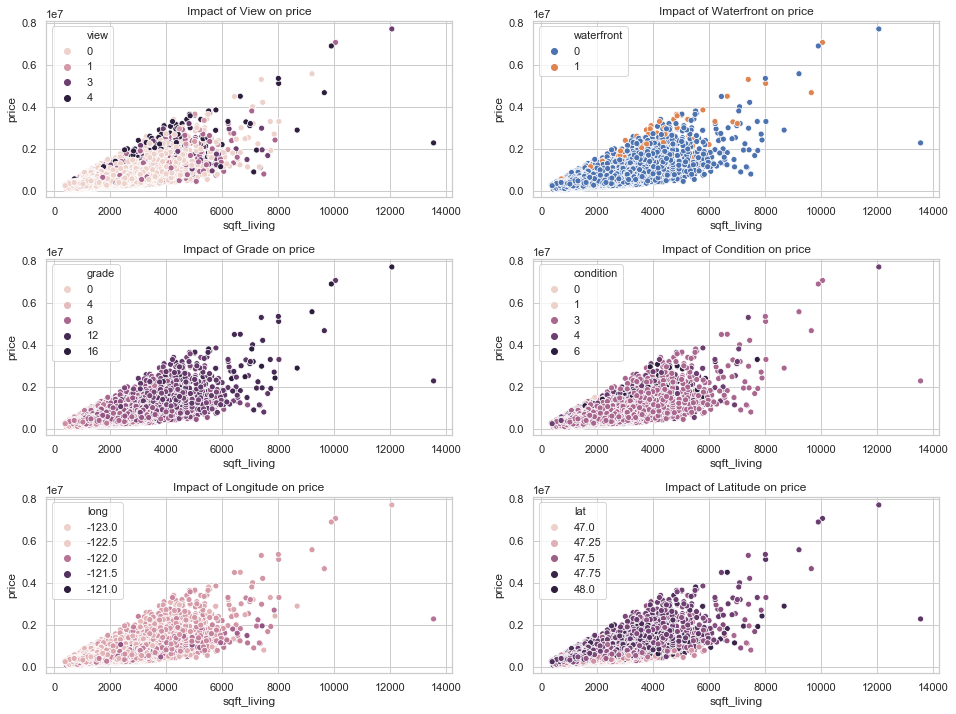

In [28]:
plt.figure(figsize=(16,12))

plt.subplot(321)
sns.scatterplot(df.sqft_living, df.price, hue=df.view)
plt.title('Impact of View on price')
plt.subplot(322)
sns.scatterplot(df.sqft_living, df.price, hue=df.waterfront)
plt.title('Impact of Waterfront on price')
plt.subplot(323)
sns.scatterplot(df.sqft_living, df.price, hue=df.grade)
plt.title('Impact of Grade on price')
plt.subplot(324)
sns.scatterplot(df.sqft_living, df.price, hue=df.condition)
plt.title('Impact of Condition on price')
plt.subplot(325)
sns.scatterplot(df.sqft_living, df.price, hue=df.long)
plt.title('Impact of Longitude on price')
plt.subplot(326)
sns.scatterplot(df.sqft_living, df.price, hue=df.lat)
plt.title('Impact of Latitude on price')

plt.subplots_adjust(hspace=0.35)
plt.show()

Now lets explore how our price correlate with some of the features

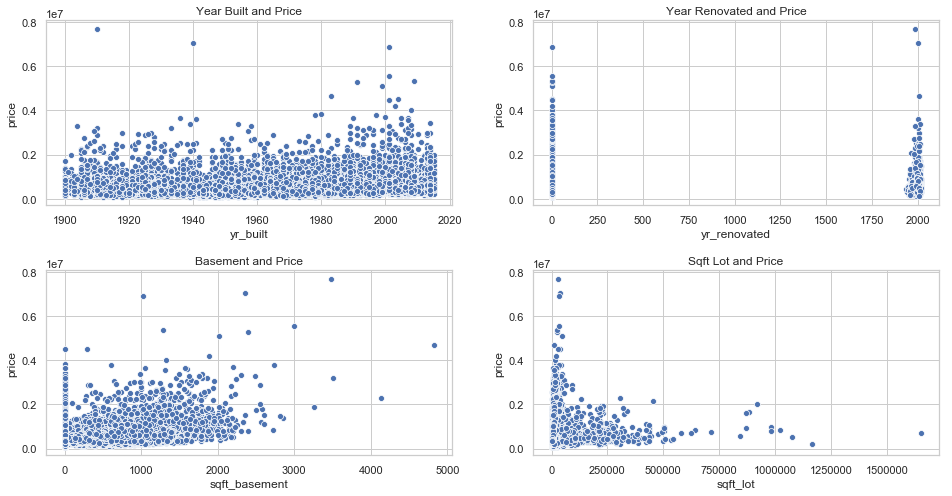

In [29]:
plt.figure(figsize=(16,8))
plt.subplot(221)
sns.scatterplot(df.yr_built, df.price)
plt.title('Year Built and Price')
plt.subplot(222)
sns.scatterplot(df.yr_renovated, df.price)
plt.title('Year Renovated and Price')
plt.subplot(223)
sns.scatterplot(df.sqft_basement, df.price)
plt.title('Basement and Price')
plt.subplot(224)
sns.scatterplot(df.sqft_lot, df.price)
plt.title('Sqft Lot and Price')

plt.subplots_adjust(hspace=0.35)
plt.show()

There is very vague correlation between house price and features above, but let's keep them for now, because they might be helpful to our model

### What influences the price?

Previously we looked at the features along with `sqft_living`, let's take a look how these features impact prices on their own

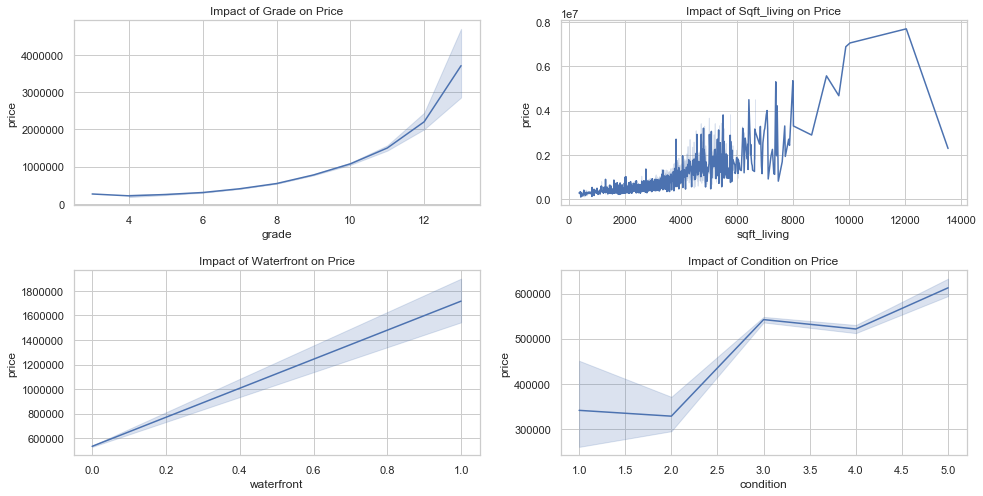

In [30]:
plt.figure(figsize=(16,8))

plt.subplot(221)
sns.lineplot(df.grade, df.price)
plt.title('Impact of Grade on Price')
plt.subplot(222)
sns.lineplot(df.sqft_living, df.price)
plt.title('Impact of Sqft_living on Price')
plt.subplot(223)
sns.lineplot(df.waterfront, df.price)
plt.title('Impact of Waterfront on Price')
plt.subplot(224)
sns.lineplot(df.condition, df.price)
plt.title('Impact of Condition on Price')

plt.subplots_adjust(hspace=0.35)
plt.show()

### How location influences the price?

Usually location plays considerable role in forming house price. Below you can find locations of houses that has been sold and their price ranges

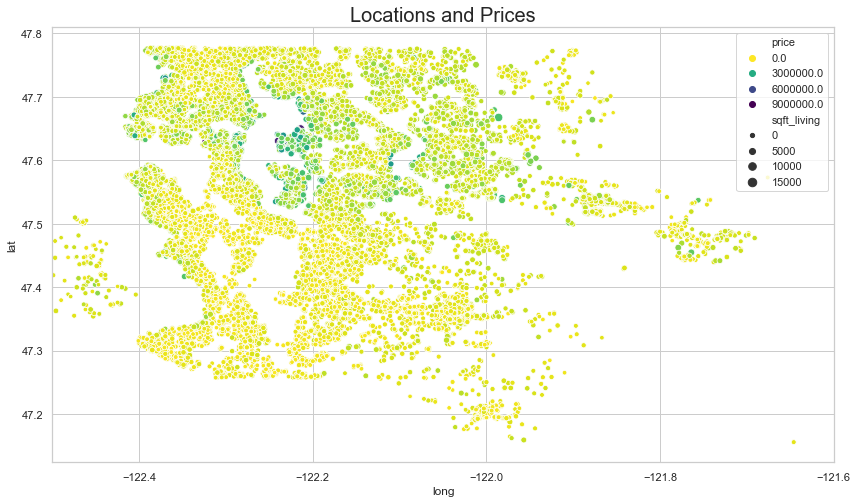

In [31]:
plt.figure(figsize=(14,8))
sns.scatterplot(df.long, df.lat, hue=df.price, size=df.sqft_living, palette='viridis_r')
plt.xlim(-122.5, -121.6)
plt.title('Locations and Prices', fontdict={'fontsize': 20})
plt.show()

### Dealing with outliers

It's important to remove outliers from our data set, because they will negatively impact our model

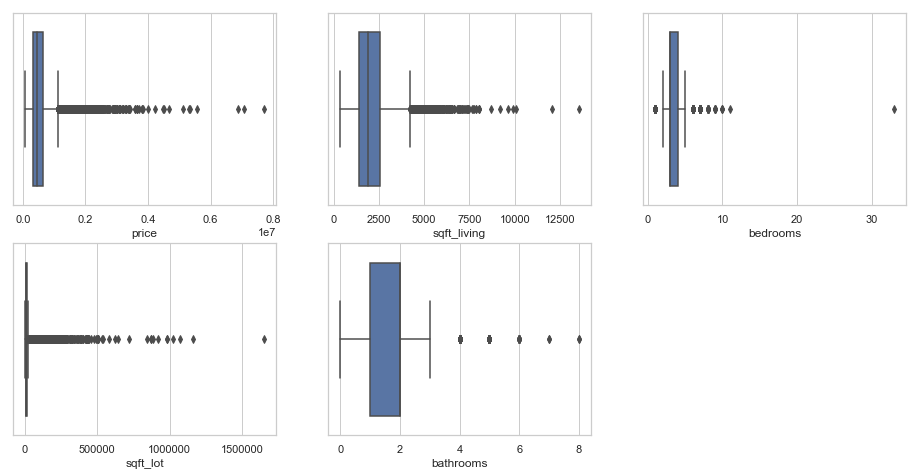

In [32]:
plt.figure(figsize=(16,12))
plt.subplot(331)
sns.boxplot(df.price)
plt.subplot(332)
sns.boxplot(df.sqft_living)
plt.subplot(333)
sns.boxplot(df.bedrooms)
plt.subplot(334)
sns.boxplot(df.sqft_lot)
plt.subplot(335)
sns.boxplot(df.bathrooms.astype('int'))

In [33]:
print('Original dataset:',len(df))
# Removing outliers from dataset
df = df[df.price < 4000000]
df = df[df.sqft_living < 8000]
df = df[df.sqft_lot < 500000]
df = df[df.bedrooms < 5]
df = df[df.bathrooms < 4]
print('After removing outliers:',len(df))

Original dataset: 21597
After removing outliers: 19469


### Dealing with categorical variables

After we done with exploratory analysis, lets figure out what features we should use as categorical and then perform hot encoding on them

### Dealing with `lat` and `long`

Here we gonna break latitude and longtitude into segments

In [34]:
segments = 10
bins = list(np.linspace(df.long.min(), df.long.max(), num=segments))
labels = [i for i in range(1,segments)]

# Hot encoding to latitude
df.lat = pd.cut(df.lat, bins, labels=labels)
df.lat = df.lat.astype('category')
lat = pd.get_dummies(df.lat,prefix='lat', drop_first=True)

# Hot encoding to longtitude
df.long = pd.cut(df.long, bins, labels=labels)
df.long = df.long.astype('category')
long = pd.get_dummies(df.long,prefix='long', drop_first=True)

# Adding dummies to dataset, removing original `lat` and `long` features
df = df.join([lat, long])
df.drop(['lat','long'], axis=1, inplace=True)

### Basement

Lets convert basement into two categories: with basement and without it

In [35]:
bins = [ -1 , 1 , df.sqft_basement.max() ]
labels = ['0','1']

df.sqft_basement = pd.cut(df.sqft_basement, bins, labels=labels)
df.sqft_basement = df.sqft_basement.astype('category')
sqft_basement = pd.get_dummies(df.sqft_basement, prefix='basement', drop_first=True)
df = df.join([sqft_basement])
df.drop(['sqft_basement'], axis=1, inplace=True)

### Renovated

Same way for yr_renovated

In [36]:
bins = [ -1 , 1 , df.yr_renovated.max() ]
labels = ['0','1']

df.yr_renovated = pd.cut(df.yr_renovated, bins, labels=labels)
df.yr_renovated = df.yr_renovated.astype('category')
yr_renovated = pd.get_dummies(df.yr_renovated, prefix='renovated', drop_first=True)
df = df.join([yr_renovated])
df.drop(['yr_renovated'], axis=1, inplace=True)

### Dealing with the rest of categorical features

Features like waterfront, view, condition, grade, zipcode and bedrooms are good to be categorical as well

In [37]:
# Making Categories
df.waterfront = df.waterfront.astype('category')
df.view = df.view.astype('category')
df.condition = df.condition.astype('category')
df.grade = df.grade.astype('category')
df.zipcode = df.zipcode.astype('category')
df.bedrooms = df.bedrooms.astype('category')
df.floors = df.floors.astype('category')
df.bathrooms = df.bathrooms.astype('int').astype('category')
df.yr_built = df.yr_built.astype('category')

# Making Dummies
waterfront = pd.get_dummies(df.waterfront, prefix='waterfront', drop_first=True)
view = pd.get_dummies(df.view, prefix='view', drop_first=True)
condition = pd.get_dummies(df.condition, prefix='condition', drop_first=True)
grade = pd.get_dummies(df.grade, prefix='grade', drop_first=True)
zipcode = pd.get_dummies(df.zipcode, prefix='zipcode', drop_first=True)
bedrooms = pd.get_dummies(df.bedrooms, prefix='bedrooms', drop_first=True)
floors = pd.get_dummies(df.floors, prefix='floors', drop_first=True)
bathrooms = pd.get_dummies(df.bathrooms, prefix='bathrooms', drop_first=True)
yr_built = pd.get_dummies(df.yr_built, prefix='yr_built', drop_first=True)

# Adding dummies to the dataset and removing original features
df = df.join([waterfront, view, condition, grade, zipcode, bedrooms, floors, yr_built, bathrooms])
df.drop(['waterfront','view','condition','grade','zipcode','bedrooms', 'floors', 'yr_built', 'bathrooms'], axis=1, inplace=True)

### Feature scaling and normalization

Our continuos features like price, sqft_living and sqft_lot have different scales. Lets perform normalization and scaling on them

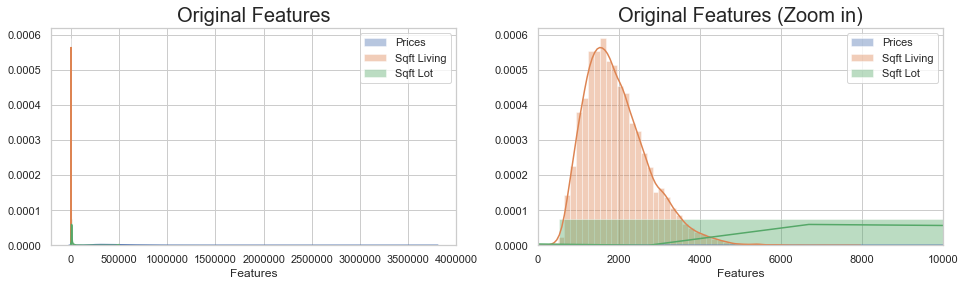

In [38]:
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.distplot(df.price, label='Prices')
sns.distplot(df.sqft_living, label='Sqft Living')
sns.distplot(df.sqft_lot, label='Sqft Lot')
plt.title('Original Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()

plt.subplot(122)
sns.distplot(df.price, label='Prices')
sns.distplot(df.sqft_living, label='Sqft Living')
sns.distplot(df.sqft_lot, label='Sqft Lot')
plt.title('Original Features (Zoom in)', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.xlim(0, 10000)
plt.legend()
plt.show()

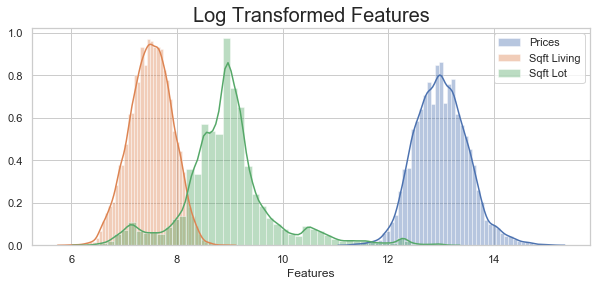

In [39]:
# Perform logariphmic transformation
price = np.log(df.price)
sqft_living = np.log(df.sqft_living)
sqft_lot = np.log(df.sqft_lot)

# Display
plt.figure(figsize=(10,4))
sns.distplot(price, label='Prices')
sns.distplot(sqft_living, label='Sqft Living')
sns.distplot(sqft_lot, label='Sqft Lot')

plt.title('Log Transformed Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()
plt.show()

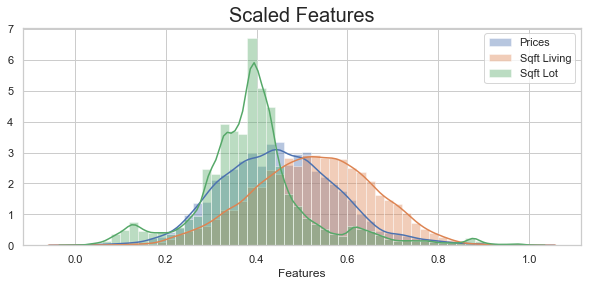

In [40]:
# Performing Min Max Scaling by hand

df['price'] = ( price - min(price) ) / ( max(price) - min(price) )
df['sqft_living'] = ( sqft_living - min(sqft_living) ) / ( max(sqft_living) - min(sqft_living) )
df['sqft_lot'] = ( sqft_lot - min(sqft_lot) ) / ( max(sqft_lot) - min(sqft_lot) )

# Display
plt.figure(figsize=(10,4))
sns.distplot(df.price, label='Prices')
sns.distplot(df.sqft_living, label='Sqft Living')
sns.distplot(df.sqft_lot, label='Sqft Lot')
plt.title('Scaled Features', fontdict={'fontsize': 20})
plt.xlabel('Features')
plt.legend()
plt.show()


## Building a Linear Regression Model

In [41]:
# This is set of function for performing linear regression and validating results
def linear_regression(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    # Errors
    print('R^2 Score:',round(linreg.score(X, y),2))
    print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),5))
    print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),5))
    print('-----------------------------------')
    print('Average Predicted Price:', round(y_pred.mean(),4))
    print('Average Actual Price:', round(y_test.mean(), 4))
    
    # Visualization of selection of 100 house prices
    plt.figure(figsize=(16,6))
    sns.lineplot(range(len(y_pred[:200])), y_pred[:200], label='Predicted Prices')
    sns.lineplot(range(len(y_pred[:200])), y_test[:200], label='Actual Prices')
    plt.title('Comparing predicted price vs actual price', fontdict={'fontsize': 20}), plt.xlabel('Values'), plt.ylabel('Prices')
    plt.legend(), plt.show()
    return (linreg, y_pred, y_test)

def cross_validation(X, y, cv=15, show_scores=False):
    score = cross_val_score(linreg, X, y, cv=cv, scoring="r2")
    print('Model Accuracy:',round(sum(score)/len(score),2)*100, '%')
    print(score) if show_scores else False
    
def feature_selection(X, y):
    est = sm.OLS(y, X).fit()
    pvalues = pd.DataFrame(est.pvalues, columns=['p'])
    features = list(pvalues[pvalues.p < 0.05].index)
    return features

R^2 Score: 0.87
Mean Absolute Error: 0.03297
Root Mean Squared Error: 0.04526
-----------------------------------
Average Predicted Price: 0.4523
Average Actual Price: 0.4518


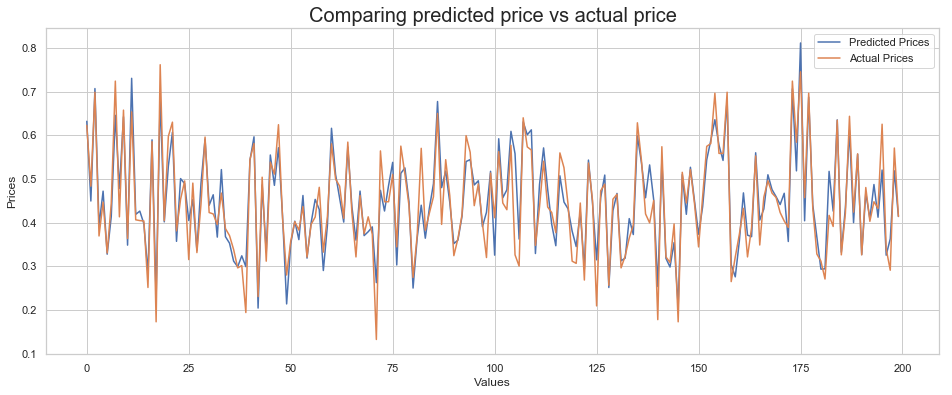

In [42]:
X = df.drop(['price'],axis=1)
y = df.price

linreg, y_pred, y_test = linear_regression(X, y)

Our original model makes good prediction, but lets see if it can perform well on all of our data

### Validation

In [43]:
cross_validation(X, y, cv=15, show_scores=True)

Model Accuracy: -3.306978198382199e+21 %
[ 8.69815314e-01  8.79480503e-01 -4.96046730e+20  8.61722742e-01
  8.83293850e-01  8.60952017e-01  8.56644188e-01  8.71954740e-01
  8.60037224e-01  8.70404570e-01  8.71361925e-01  8.79957229e-01
  8.72250062e-01  8.78372377e-01  8.89415737e-01]


Cross validation has negative result, meaning our model performed really bad on some of our data

### Feature Selection

Feature selection might solve this problem. Let's select features that has impact on our model and remove ones that can lead to noize and misdirection

In [44]:
significant_features = feature_selection(X, y)
print('Significant features:',len(significant_features),'\nAll features:',len(X.columns))

Significant features: 157 
All features: 234


Lets perform our model using only selected features (with p-value < 0.05)

R^2 Score: 0.87
Mean Absolute Error: 0.0338
Root Mean Squared Error: 0.04646
-----------------------------------
Average Predicted Price: 0.4506
Average Actual Price: 0.4509


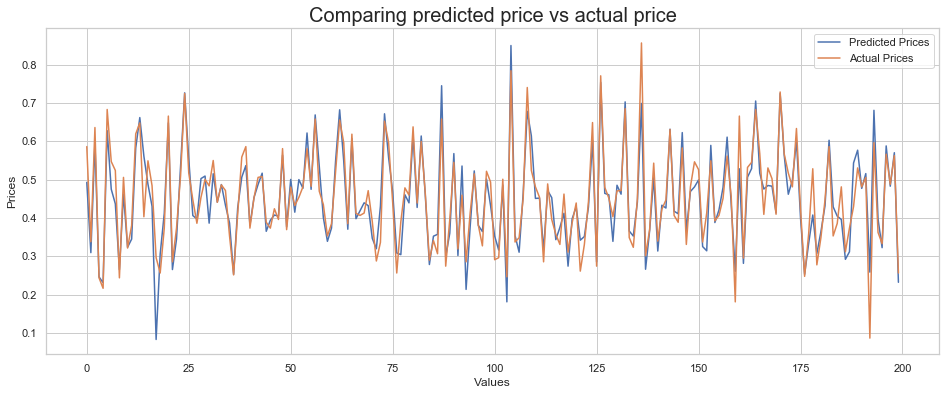

In [45]:
X = df[significant_features]
y = df.price
linreg, y_pred, y_test = linear_regression(X, y)

In [46]:
cross_validation(X, y, cv=5)

Model Accuracy: 87.0 %


### Most significant features

In [47]:
features = pd.DataFrame(linreg.coef_, index=significant_features, columns=['Features'])
features.sort_values(by='Features', ascending=False).head()

,Features
lat_2,1.117039e+11
sqft_living,3.894638e-01
zipcode_98039,3.406720e-01
zipcode_98004,2.980971e-01
zipcode_98112,2.839293e-01


## Conclusion

After making necessary cleaning and modification of our data, model performs with 87% accuracy accross all of our data.

We selected important features and rejected the ones that can negatively impact result of the prediction.

Location and size of the house have biggest impact on house price.